In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
df = pd.read_csv('data/advertising_campaign.csv').drop(['Unnamed: 0'], axis = 1)
df

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,666743,banner,interest,0.50,NaN,Android,150000
1,512217,video,interest,0.75,NaN,iOS,150000
2,399556,search,INTEREST,1.50,NaN,iOS,150000
3,230119,search,INTEREST,1.50,NaN,iOS,150000
4,619571,search,CONSIDERATION,1.50,NaN,iOS,150000
...,...,...,...,...,...,...,...
4228776,501946,search,INTENT,1.50,NaN,Android,224125
4228777,749577,search,PURCHASE,1.50,2136.0,iOS,224647
4228778,929180,search,INTENT,1.50,NaN,iOS,224682
4228779,1034498,search,INTENT,1.50,NaN,iOS,225430


In [3]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4228781 entries, 0 to 4228780
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   user_id       4228781 non-null  int64  
 1   ad_channel    4228781 non-null  object 
 2   funnel_stage  4228781 non-null  object 
 3   price         4207450 non-null  float64
 4   profit        4879 non-null     float64
 5   os            4228781 non-null  object 
 6   timestamp     4228781 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 225.8+ MB


# Data Preparation

In [4]:
# уникальные значения атрибута ad_channel

df['ad_channel'].unique()

array(['banner', 'video', 'search', 'rich', 'partner_network',
       'organic_traffic', 'native', 'other'], dtype=object)

In [5]:
# уникальные значения атрибута funnel_stage

df['funnel_stage'].unique()

array(['interest', 'INTEREST', 'CONSIDERATION', 'intent', 'INTENT',
       'consideration', 'PURCHASE', 'purchase'], dtype=object)

В столбце нет единообразия записей, поэтому приведу их к нижнему регистру

In [6]:
df['funnel_stage'] = df['funnel_stage'].apply(lambda x: x.lower())
df

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,666743,banner,interest,0.50,NaN,Android,150000
1,512217,video,interest,0.75,NaN,iOS,150000
2,399556,search,interest,1.50,NaN,iOS,150000
3,230119,search,interest,1.50,NaN,iOS,150000
4,619571,search,consideration,1.50,NaN,iOS,150000
...,...,...,...,...,...,...,...
4228776,501946,search,intent,1.50,NaN,Android,224125
4228777,749577,search,purchase,1.50,2136.0,iOS,224647
4228778,929180,search,intent,1.50,NaN,iOS,224682
4228779,1034498,search,intent,1.50,NaN,iOS,225430


In [7]:
df['funnel_stage'].unique()

array(['interest', 'consideration', 'intent', 'purchase'], dtype=object)

In [8]:
#проверка на пропуски

df.isnull().sum().sort_values()

user_id               0
ad_channel            0
funnel_stage          0
os                    0
timestamp             0
price             21331
profit          4223902
dtype: int64

<Axes: >

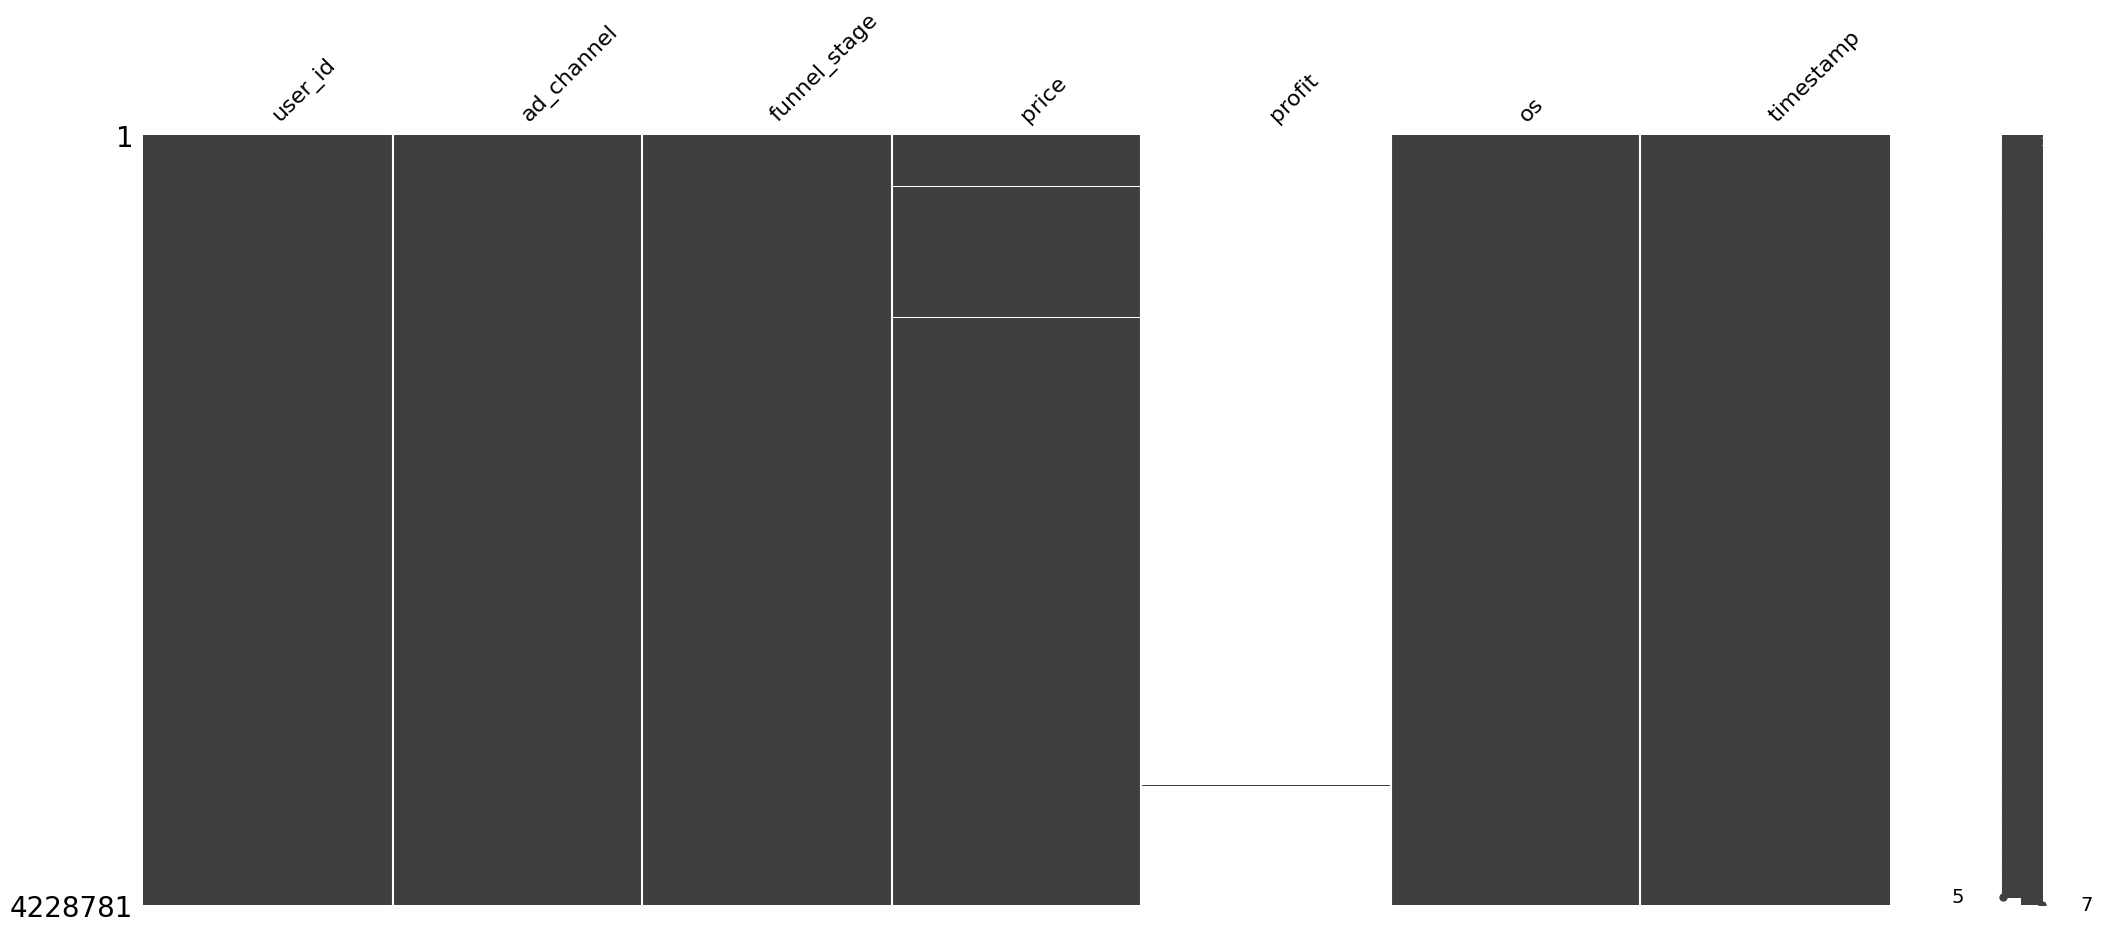

In [9]:
msno.matrix(df)

In [10]:
# количество пропусков в процентах

round(((df.isna().sum() / len(df)) * 100).sort_values(ascending = False), 2)

profit          99.88
price            0.50
user_id          0.00
ad_channel       0.00
funnel_stage     0.00
os               0.00
timestamp        0.00
dtype: float64

Сохраню в отдельную переменную строки с пропусками в столбце price

In [11]:
#отдельный датафрейм с пропусками в price

df_price_isnull = df[df['price'].isnull()] #был df_ad_channel_other
df_price_isnull.head()

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
122,866112,other,interest,NaN,NaN,Android,150009
197,634356,other,interest,NaN,NaN,iOS,150014
2149,160340,other,interest,NaN,NaN,Android,150030
2668,1004246,other,interest,NaN,NaN,Android,150036
2969,897963,other,interest,NaN,NaN,Android,150048


In [12]:
df_price_isnull.shape

(21331, 7)

In [13]:
# вывод уникальных значений ad_channel для строк с пропусками в price

df_price_isnull['ad_channel'].unique()

array(['other'], dtype=object)

In [14]:
df[df['ad_channel'] == 'other'].head()

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
122,866112,other,interest,NaN,NaN,Android,150009
197,634356,other,interest,NaN,NaN,iOS,150014
2149,160340,other,interest,NaN,NaN,Android,150030
2668,1004246,other,interest,NaN,NaN,Android,150036
2969,897963,other,interest,NaN,NaN,Android,150048


In [15]:
df[df['ad_channel'] == 'other'].shape

(21331, 7)

In [16]:
#удалю строки с price = other

df_campaign = df[df['ad_channel'] != 'other'].copy()

In [17]:
df_campaign.funnel_stage.unique()

array(['interest', 'consideration', 'intent', 'purchase'], dtype=object)

Предположительно, пропуски в колонке profit находятся в тех строках, которые соответсвуют этапам воронки != purchase (покупка), т.к. получить прибыль можно только на этапе покупки. Проверю это

In [18]:
df_campaign[df_campaign['funnel_stage'] == 'purchase'].isnull().sum().sort_values()

user_id         0
ad_channel      0
funnel_stage    0
price           0
profit          0
os              0
timestamp       0
dtype: int64

In [19]:
df_campaign[df_campaign['funnel_stage'] == 'purchase'].shape

(4835, 7)

In [20]:
df_campaign[df_campaign['profit'].isnull()].shape

(4202615, 7)

In [21]:
df_campaign.shape

(4207450, 7)

In [22]:
4207450-4202615

4835

In [23]:
#пропуски в столбце profit заменю на 0, т.к. прибыль возможна только на этапе покупки, а в таблице строки по всей воронке

df_campaign['profit'] = df_campaign['profit'].fillna(0.0)

In [24]:
df_campaign.isnull().sum().sort_values()

user_id         0
ad_channel      0
funnel_stage    0
price           0
profit          0
os              0
timestamp       0
dtype: int64

# Количество уникальных user_id по этапам воронки

In [25]:
# правильный порядок этапов воронки

funnel_stage_order = ['interest', 'consideration', 'intent', 'purchase']

In [26]:
# упорядочивание этапов воронки в датасете

df_campaign['funnel_stage'] = pd.Categorical(df_campaign['funnel_stage'], categories=funnel_stage_order, ordered=True)
df_campaign

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,666743,banner,interest,0.50,0.0,Android,150000
1,512217,video,interest,0.75,0.0,iOS,150000
2,399556,search,interest,1.50,0.0,iOS,150000
3,230119,search,interest,1.50,0.0,iOS,150000
4,619571,search,consideration,1.50,0.0,iOS,150000
...,...,...,...,...,...,...,...
4228776,501946,search,intent,1.50,0.0,Android,224125
4228777,749577,search,purchase,1.50,2136.0,iOS,224647
4228778,929180,search,intent,1.50,0.0,iOS,224682
4228779,1034498,search,intent,1.50,0.0,iOS,225430


In [27]:
df_uniq_user = df_campaign.groupby(['ad_channel', 'funnel_stage'], observed=True).agg({'user_id': 'nunique'}).reset_index()
df_uniq_user = df_uniq_user.sort_values(['ad_channel', 'funnel_stage'])
df_uniq_user['cr'] = df_uniq_user.groupby('ad_channel')['user_id'].transform(lambda x: round((x / x.iloc[0])*100, 2))

df_uniq_user

,ad_channel,funnel_stage,user_id,cr
0,banner,interest,92002,100.00
1,banner,consideration,47454,51.58
2,banner,intent,7630,8.29
3,banner,purchase,690,0.75
4,native,interest,19382,100.00
5,native,consideration,12585,64.93
6,native,intent,411,2.12
7,native,purchase,36,0.19
8,organic_traffic,interest,78719,100.00
9,organic_traffic,consideration,53618,68.11


Для всех рекламнх источников на первых этапах воронки (interest, consideration) характерен высокий трафик. Но при этом до финального этапа доходит минимальное число пользователей. Это может свидетельствовать либо о неверно выбранной аудитории для рекламы, либо о фродовом трафике.

Наиболее подозрительными каналами являются video и native, где при огромном количестве заинтересованных пользователей до покупки доходит лишь несколько десятков или единиц. Это может указывать на накликивание и требует дополнительной проверки

# Анализ на фальсификацию

Подсчет количества действий, сделанных пользователем в момент времени 

In [28]:
df_users_action = df_campaign.groupby(['user_id', 'timestamp', 'ad_channel']).size().reset_index(name='action_count')
df_users_action.head()

,user_id,timestamp,ad_channel,action_count
0,2,184320,search,1
1,3,171761,search,1
2,4,183254,organic_traffic,555
3,5,153069,organic_traffic,1
4,5,153692,organic_traffic,1


In [32]:
df_users_action.action_count.describe()

count    983355.000000
mean          4.278668
std          43.333767
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1192.000000
Name: action_count, dtype: float64

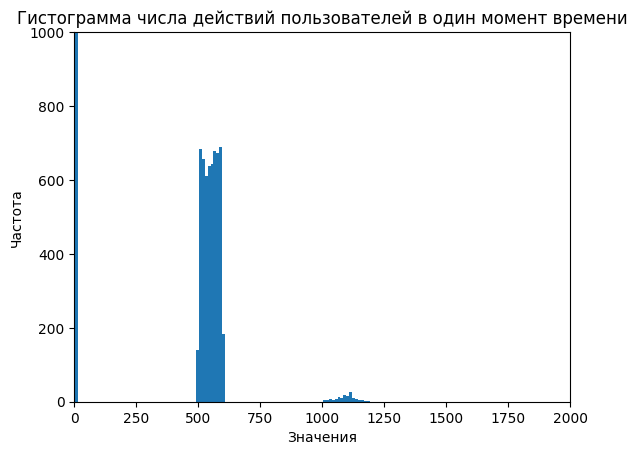

In [120]:
plt.hist(df_users_action.action_count, bins=100)
plt.xlim(0, 2000)
plt.ylim(0, 1000)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма числа действий пользователей в один момент времени');

Для нормального поведения реального пользователя характерно одно действие в момент времени. Статистики по полученному датасету с подсчетом действий показывают, что есть случаи, когда в один момент времени совершено до 1192 действий. Это также отражено на гистограмме и говорит о том, что данные по некоторым каналам были сфальсифицированы

In [35]:
df_users_action_frod = df_users_action[df_users_action['action_count'] > 1]
print('Количество сфальсифицированных уникальных user_id:', df_users_action_frod.shape[0])

Количество сфальсифицированных уникальных user_id: 5738


In [36]:
#очистка исходного датасета от фродовых пользователей

df_cleaned = df_campaign[~df_campaign['user_id'].isin(df_users_action_frod['user_id'])]
df_cleaned.head()

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
0,666743,banner,interest,0.50,0.0,Android,150000
1,512217,video,interest,0.75,0.0,iOS,150000
2,399556,search,interest,1.50,0.0,iOS,150000
3,230119,search,interest,1.50,0.0,iOS,150000
4,619571,search,consideration,1.50,0.0,iOS,150000


In [37]:
df_cleaned.to_csv('data/advertising_cleaned.csv')

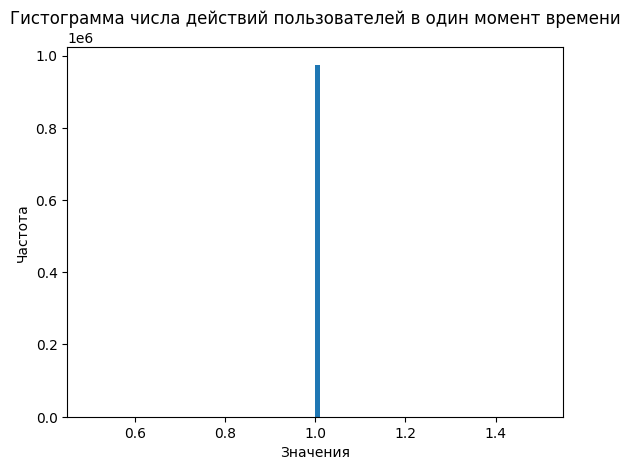

In [38]:
plt.hist(df_cleaned.groupby(['user_id', 'timestamp', 'ad_channel']).size().reset_index(name='action_count').action_count, bins=100)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма числа действий пользователей в один момент времени');

In [39]:
#сохранение фродовых значений в отдельный датасет

df_frod = df_campaign[df_campaign['user_id'].isin(df_users_action_frod['user_id'])]
df_frod.head()

,user_id,ad_channel,funnel_stage,price,profit,os,timestamp
334,688974,partner_network,interest,1.0,0.0,Android,150024
335,688974,partner_network,interest,1.0,0.0,iOS,150024
336,688974,partner_network,interest,1.0,0.0,iOS,150024
337,688974,partner_network,interest,1.0,0.0,iOS,150024
338,688974,partner_network,interest,1.0,0.0,Android,150024


In [40]:
df_frod.to_csv('data/advertising_frod.csv')

In [41]:
#Процент фродовых пользователей от общего числа пользователей

print('Процент фродовых пользователей:', round((100-df_cleaned.shape[0]/df_campaign.shape[0]*100), 2))

Процент фродовых пользователей: 76.84
